In [39]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers

# **Read CSV**

In [40]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/DS assignment 5/ionosphere_data.csv')
data.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


# **Data Cleaning and Missing values**







In [41]:
#Check the shape of data
data.shape

# Data information
#data.info

# Describe the data
#data.describe()

#Check for the missing values
# isnull().sum() return the number of null values in a column
#data.isnull().sum()

(351, 35)

In [42]:
#Check weather V13 is filled 
data.isnull().sum()
# Handeling the missing data
# handle missing value in train_data
#data["V13"] = data["V13"].fillna(data["V13"].mean())


feature1     0
feature2     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
feature13    0
feature14    0
feature15    0
feature16    0
feature17    0
feature18    0
feature19    0
feature20    0
feature21    0
feature22    0
feature23    0
feature24    0
feature25    0
feature26    0
feature27    0
feature28    0
feature29    0
feature30    0
feature31    0
feature32    0
feature33    0
feature34    0
label        0
dtype: int64

# **Summary of Dataset Classes**

In [43]:

# summarize the class distribution
from collections import Counter
print(data.shape)
target = data.values[:,-1]
counter = Counter(target)
print(counter.items())
print(len(target))

#for k,v in counter.items():
#	per = v / len(target) * 100
#	print('Class=%f, Count=%d, Percentage=%.3f%%' % (k, v, per))

(351, 35)
dict_items([('g', 225), ('b', 126)])
351


# **Split Dataset**

Below create Train Test and Validation datasets

In [44]:
# one hot encoding
data['label'] = data['label'].map({'g':1, 'b':0}).astype(int)  

In [45]:
#Divide Dataset 

df = data
x = df.drop(['label'], axis = 1)
y =  data['label']

# Split dataset in train Test and Validation
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x,y, test_size = 0.4 , random_state = 1, stratify=y)
train_x.shape , test_x.shape, train_y.shape, test_y.shape


((210, 34), (141, 34), (210,), (141,))

# **MODEL**

In [49]:
#Create a model

network =  models.Sequential()
network.add(tf.keras.layers.Dense(64 , activation = 'relu', input_shape = (34,)))
network.add(tf.keras.layers.Dense(32, activation = 'relu' ))
network.add(tf.keras.layers.Dense(16, activation = 'relu' ))
network.add(tf.keras.layers.Dense(1, activation = 'relu' ))

In [50]:
from keras.optimizers import SGD
opt = SGD(lr=0.01, momentum=0.3)
network.compile(loss ='binary_crossentropy', optimizer =opt, metrics = 'accuracy')

# **Epochs**

In [51]:
history = network.fit(x, y, epochs = 20 , batch_size = 200)

Epoch 1/20
2/2 [==============================] - 0s 5ms/step - loss: 9.5749 - accuracy: 0.3643
Epoch 2/20
2/2 [==============================] - 0s 6ms/step - loss: 3.6788 - accuracy: 0.3579
Epoch 3/20
2/2 [==============================] - 0s 6ms/step - loss: 1.2630 - accuracy: 0.6362
Epoch 4/20
2/2 [==============================] - 0s 5ms/step - loss: 0.6626 - accuracy: 0.6689
Epoch 5/20
2/2 [==============================] - 0s 5ms/step - loss: 0.6310 - accuracy: 0.6827
Epoch 6/20
2/2 [==============================] - 0s 7ms/step - loss: 0.6019 - accuracy: 0.6918
Epoch 7/20
2/2 [==============================] - 0s 4ms/step - loss: 0.5559 - accuracy: 0.7101
Epoch 8/20
2/2 [==============================] - 0s 4ms/step - loss: 0.5540 - accuracy: 0.7360
Epoch 9/20
2/2 [==============================] - 0s 4ms/step - loss: 0.5163 - accuracy: 0.7484
Epoch 10/20
2/2 [==============================] - 0s 5ms/step - loss: 0.5365 - accuracy: 0.7738
Epoch 11/20
2/2 [======================

## **Prediction**

In [52]:
y_pred = network.predict_classes(test_x)
#Convert 2D arry to 1D 
pred2 = y_pred.reshape(-1)
df = pd.DataFrame({'Actual': test_y, 'Predicted': pred2})


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


# **Evaluate Model**

In [53]:
# evaluate the model
_, train_acc = network.evaluate(train_x, train_y, verbose=0)
_, test_acc = network.evaluate(test_x, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))


Train: 0.886, Test: 0.830


# **Plot Graphs**

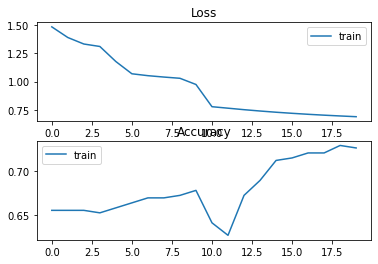

In [37]:
# plot loss during training
import matplotlib.pyplot as pyplot
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
#pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()


# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
#pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()